###INTERNET PRIVACY POLL (OPTIONAL)

Internet privacy has gained widespread attention in recent years. To measure the degree to which people are concerned about hot-button issues like Internet privacy, social scientists conduct polls in which they interview a large number of people about the topic. In this assignment, we will analyze data from a July 2013 Pew Internet and American Life Project poll on Internet anonymity and privacy, which involved interviews across the United States. While the full polling data can be found here, we will use a more limited version of the results, available in AnonymityPoll.csv. The dataset has the following fields (all Internet use-related fields were only collected from interviewees who either use the Internet or have a smartphone):

* Internet.Use: A binary variable indicating if the interviewee uses the Internet, at least occasionally (equals 1 if the interviewee uses the Internet, and equals 0 if the interviewee does not use the Internet).
* Smartphone: A binary variable indicating if the interviewee has a smartphone (equals 1 if they do have a smartphone, and equals 0 if they don't have a smartphone).
* Sex: Male or Female.
* Age: Age in years.
* State: State of residence of the interviewee.
* Region: Census region of the interviewee (Midwest, Northeast, South, or West).
* Conservativeness: Self-described level of conservativeness of interviewee, from 1 (very liberal) to 5 (very conservative).
* Info.On.Internet: Number of the following items this interviewee believes to be available on the Internet for others to see: (1) Their email address; (2) Their home address; (3) Their home phone number; (4) Their cell phone number; (5) The employer/company they work for; (6) Their political party or political affiliation; (7) Things they've written that have their name on it; (8) A photo of them; (9) A video of them; (10) Which groups or organizations they belong to; and (11) Their birth date.
* Worry.About.Info: A binary variable indicating if the interviewee worries about how much information is available about them on the Internet (equals 1 if they worry, and equals 0 if they don't worry).
* Privacy.Importance: A score from 0 (privacy is not too important) to 100 (privacy is very important), which combines the degree to which they find privacy important in the following: (1) The websites they browse; (2) Knowledge of the place they are located when they use the Internet; (3) The content and files they download; (4) The times of day they are online; (5) The applications or programs they use; (6) The searches they perform; (7) The content of their email; (8) The people they exchange email with; and (9) The content of their online chats or hangouts with others.
* Anonymity.Possible: A binary variable indicating if the interviewee thinks it's possible to use the Internet anonymously, meaning in such a way that online activities can't be traced back to them (equals 1 if he/she believes you can, and equals 0 if he/she believes you can't).
* Tried.Masking.Identity: A binary variable indicating if the interviewee has ever tried to mask his/her identity when using the Internet (equals 1 if he/she has tried to mask his/her identity, and equals 0 if he/she has not tried to mask his/her identity).
* Privacy.Laws.Effective: A binary variable indicating if the interviewee believes United States law provides reasonable privacy protection for Internet users (equals 1 if he/she believes it does, and equals 0 if he/she believes it doesn't).

R:
> read.csv()
> str(poll)

python:
> pd.read_csv()
> poll.shape

In [6]:
import numpy as np
import pandas as pd

poll = pd.read_csv('data/AnonymityPoll.csv')
poll.shape

(1002, 13)

### 1.1 LOADING AND SUMMARIZING THE DATASET
Let's look at the breakdown of the number of people with smartphones using the table() and summary() commands on the Smartphone variable. (HINT: These three numbers should sum to 1002.)
* How many interviewees responded that they use a smartphone?
* How many interviewees responded that they don't use a smartphone?
* How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?


In [14]:
print (poll.Smartphone == 1).sum()
print (poll.Smartphone == 0).sum()
print 1002 - (poll.Smartphone == 1).sum()-(poll.Smartphone == 0).sum()

487
472
43


* table() in R vs crosstab() in python

In [23]:
table = pd.crosstab(poll.State, poll.Region)
print table
table.South[table.South == max(table.South)]

Region                Midwest  Northeast  South  West
State                                                
Alabama                     0          0     11     0
Arizona                     0          0      0    24
Arkansas                    0          0     10     0
California                  0          0      0   103
Colorado                    0          0      0    19
Connecticut                 0          8      0     0
Delaware                    0          0      6     0
District of Columbia        0          0      2     0
Florida                     0          0     42     0
Georgia                     0          0     34     0
Idaho                       0          0      0     8
Illinois                   32          0      0     0
Indiana                    27          0      0     0
Iowa                       14          0      0     0
Kansas                     14          0      0     0
Kentucky                    0          0     25     0
Louisiana                   

State
Texas    72
Name: South, dtype: int64

### 2.1 - INTERNET AND SMARTPHONE USERS  
* How many interviewees reported not having used the Internet and not having used a smartphone?
* How many interviewees reported having used the Internet and having used a smartphone?
* How many interviewees reported having used the Internet but not having used a smartphone?

In [26]:
pd.crosstab(poll.Smartphone, poll['Internet.Use'])

Internet.Use,0.0,1.0
Smartphone,,
0,186,285
1,17,470


* Deal with missing value
count the number of missing value

In [31]:
print poll['Internet.Use'].isnull().sum()
print poll['Smartphone'].isnull().sum()

1
43


* Ceate a subset of the data

In [54]:
newPoll = poll[(poll['Internet.Use'] == 1) | (poll['Smartphone'] == 1)]
newPoll.shape

(792, 13)

* find missing value

In [58]:
newPoll.isnull().sum()

Internet.Use               0
Smartphone                20
Sex                        0
Age                       22
State                      0
Region                     0
Conservativeness          45
Info.On.Internet           0
Worry.About.Info           2
Privacy.Importance         5
Anonymity.Possible        39
Tried.Masking.Identity     8
Privacy.Laws.Effective    65
dtype: int64

1. What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?
2. How many interviewees reported a value of 0 for Info.On.Internet?
3. How many interviewees reported the maximum value of 11 for Info.On.Internet?

In [100]:
print newPoll['Info.On.Internet'].mean()
print (newPoll['Info.On.Internet'] == 0).sum()
print (newPoll['Info.On.Internet'] == 11).sum()

# count frequency in column of DataFrame

def table(column):
    infoDict = {k:v for k,v in zip(set(column),np.zeros(12))}
    for v in column:
        infoDict[v] = infoDict[v] + 1
    return infoDict

3.79545454545
105
8
{0.0: 105.0, 1.0: 84.0, 2.0: 95.0, 3.0: 101.0, 4.0: 104.0, 5.0: 94.0, 6.0: 67.0, 7.0: 63.0, 8.0: 40.0, 9.0: 18.0, 10.0: 13.0, 11.0: 8.0}


* What proportion of interviewees who answered the Worry.About.Info question worry about how much information is available about them on the Internet? Note that to compute this proportion you will be dividing by the number of people who answered the Worry.About.Info question, not the total number of people in the data frame.

In [108]:
total = float(poll['Worry.About.Info'].notnull().sum())
worry = (poll['Worry.About.Info'] == 1).sum()
print worry/total

0.488607594937


* What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?

In [111]:
total = float(poll['Anonymity.Possible'].notnull().sum())
anonymity = (poll['Anonymity.Possible'] == 1).sum()
print anonymity/total

0.369189907039


* What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking their identity on the Internet?

In [113]:
total = float(poll['Tried.Masking.Identity'].notnull().sum())
tried = (poll['Tried.Masking.Identity'] == 1).sum()
print tried/total

0.163265306122


* What proportion of interviewees who answered the Privacy.Laws.Effective question find United States privacy laws effective?

In [115]:
total = float(poll['Privacy.Laws.Effective'].notnull().sum())
privacy = (poll['Privacy.Laws.Effective'] == 1).sum()
print privacy/total

0.261744966443


###3 - RELATING DEMOGRAPHICS TO POLLING RESULTS  

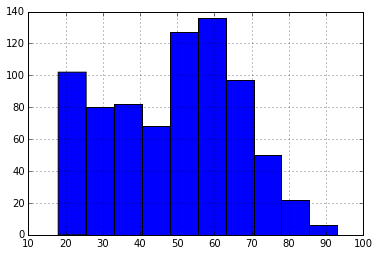

In [128]:
%matplotlib inline 
import matplotlib.pyplot as plt

newPoll['Age'].hist(bins = 10)

In [133]:
pd.crosstab(newPoll.Age, newPoll['Info.On.Internet']).max()

Info.On.Internet
0     6
1     6
2     5
3     5
4     5
5     5
6     5
7     5
8     4
9     2
10    2
11    2
dtype: int64

In [135]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

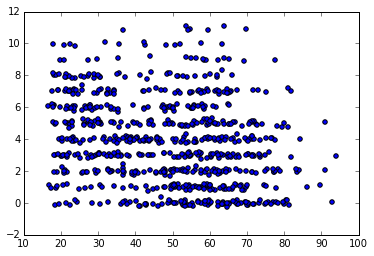

In [138]:
plt.scatter(rand_jitter(newPoll.Age), rand_jitter(newPoll['Info.On.Internet']))

* group Info.On.Internet by whether he/she is a smartphone user

In [142]:
smartPhone_groupby = newPoll.groupby('Smartphone')
smartPhone_groupby.mean()['Info.On.Internet']

Smartphone
0    2.922807
1    4.367556
Name: Info.On.Internet, dtype: float64

In [147]:
smartPhone_groupby.aggregate(lambda x: (x==1).sum()/float(len(x)))

,Internet.Use,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
Smartphone,,,,,,,,,,,,
0,1.000000,0,0,0,0,0.038596,0.150877,0.477193,0,0.343860,0.115789,0.207018
1,0.965092,0,0,0,0,0.049281,0.082136,0.496920,0,0.347023,0.190965,0.248460
